# Apr 30, 2019
# May 2, 2019
## Regression
2018020143 민정원

## 인공신경망   
: 인간 신경망의 원리 모방
## 인공지능은 함수적 원리 이용  
: 입력 -> ? -> 출력   
## 함수  
: 우리는 y=ax+b를 '모델'이라고 부름
: 어떤 값이 입력(x)되어 가공(a)이 이루어진 뒤 출력(y)되는 것   
: y=ax_1+bx_2+c에서 입력은 x_1, x_2
: 출력 또한 여러가지일 수 있음    
: 입력과 출력 사이에 여러 층위를 더할 수 있음    
## 행렬    
: cf.벡터는 가로(혹은 세로의) 숫자열을 의미
: 입력벡터 * ㅁ = 출력벡터   
: ex. 벡터 * 함수행렬 = 벡터  
  ('수면시간, 운동시간, 칼로리 섭취량'을 보고 '체중, 혈압'을 알아낼 수 있겠다)   
  (세 개 입력벡터, 두 개 출력벡터)   
  (함수행렬을 구하기 위해서는 다량의 데이터가 필요) 
  함수행렬은 입력벡터와 출력벡터로부터 알아낸 패턴
## 목표    
: 데이터를 가지고 좋은 함수행렬 구하기 
: y=ax+b에서 a와 b 추정하기
: 2차원 데이터를 설명해주는 모델은 1차원(2차원에서는 선), 3차원 데이터를 설명해주는 모델은 2차원의 면(3차원에서는 평면),....
## 딥러닝   
: 입력벡터에서 시작해서 출력벡터를 도출해낼 때 여러 함수행렬을 거쳐야 함   
: ex. 음성인식, 위기경보, 음성합성, 바둑, 감정분석, 얼굴인식, 문자인식, 자동번역, 로봇제어, 그림변형, 스팸필터.....      



# import modules

In [1]:
# 파이썬에서 가장 중요한 모듈 세 가지
import pandas as pd # 엑셀 파일을 불러오기
import numpy as np # numpy:행렬 형태로 만들기
import matplotlib.pyplot as plt # plot하기
# 머신러닝에서 가장 중요한 모듈 tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# data preparation and visualization

In [2]:
pd.read_csv('regression.csv')
# 괄호 안은 file명

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


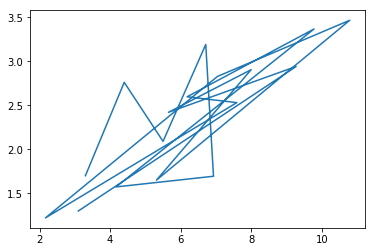

In [3]:
# data라는 variable로 받기
data = pd.read_csv('regression.csv')
# 불러왔던 data라는 파일에서 X에 해당하는 값 받기
X = data['X']
# 불러왔던 data라는 파일에서 Y에 해당하는 값 받기
Y = data['Y']
# 0번째 값에서 16번째 값을 모두 연결시킨 그래프로 plot하기(늘 plot 가능한 건 아님)
plt.plot(X, Y)

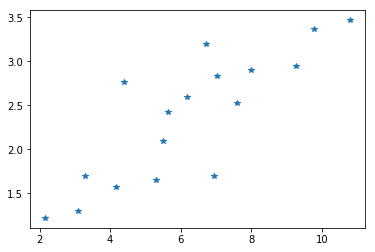

In [13]:
# data라는 variable로 받기
data = pd.read_csv('regression.csv')
# 불러왔던 data라는 파일에서 X에 해당하는 값 받기
X = data['X']
# 불러왔던 data라는 파일에서 Y에 해당하는 값 받기
Y = data['Y']
# 늘 plot 가능한 건 아님
plt.plot(X, Y, '*')

# create model
: model - 식을 세운다  

In [4]:
# 모델의 시작, 껍데기
# sequence : 모든 인공신경은 sequence 형태를 따른다
model = Sequential()
# 모델의 정의(모델은 x와 y의 개수에 따라 정해진다)
# Dense는 모델 이름, 앞의 1은 y의 개수, input shape = [1]는 x의 개수 
# Dense의 의미 : input과 output이 완전 connect되어있다는 의미
model.add(Dense(1, input_shape=[1]))
# optimizer : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
# loss : 실제 y값과 모델을 통해 구한 값의 오차 측정
model.compile(optimizer="sgd", loss='mse')
# 과정 : 처음에는 a, b에 임위적인 값을 부여하여 y값 계산하여 예측값 만들기, 이 경우 예측값은 target(real y)과 차이 발생, 차이를 반영하여 a,b 다시 설정
# 차이를 반영하여 a, b값을 조정하는 데는 미분 방식을 사용
# 우리 데이터로는 이 a, b를 추정하는 데 0~16까지 돌리는데 이를 한 epoch라고 함

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# train model
: 좋은 a, b 값을 추정하는 단계

In [8]:
model.fit(X, Y)

17/17 [==============================] - 0s 5ms/sample - loss: 2.3635


In [10]:
model.fit(X, Y, epochs=1000)
# 아래 결과의 loss값은 추정한 직선과 데이터의 차이
# 1000번의 epoch를 거치면서 loss를 줄여나감

Epoch 1/1000
17/17 [==============================] - 0s 5ms/sample - loss: 2.3671
Epoch 2/1000
17/17 [==============================] - 0s 79us/sample - loss: 0.1807
Epoch 3/1000
17/17 [==============================] - 0s 93us/sample - loss: 0.1602
Epoch 4/1000
17/17 [==============================] - 0s 74us/sample - loss: 0.1600
Epoch 5/1000
17/17 [==============================] - 0s 83us/sample - loss: 0.1600
Epoch 6/1000
17/17 [==============================] - 0s 86us/sample - loss: 0.1599
Epoch 7/1000
17/17 [==============================] - 0s 97us/sample - loss: 0.1599
Epoch 8/1000
17/17 [==============================] - 0s 171us/sample - loss: 0.1599
Epoch 9/1000
17/17 [==============================] - 0s 103us/sample - loss: 0.1599
Epoch 10/1000
17/17 [==============================] - 0s 96us/sample - loss: 0.1598
Epoch 11/1000
17/17 [==============================] - 0s 182us/sample - loss: 0.1598
Epoch 12/1000
17/17 [==============================] - 0s 304us/sample -

17/17 [==============================] - 0s 97us/sample - loss: 0.1578
Epoch 98/1000
17/17 [==============================] - 0s 102us/sample - loss: 0.1577
Epoch 99/1000
17/17 [==============================] - 0s 111us/sample - loss: 0.1577
Epoch 100/1000
17/17 [==============================] - 0s 113us/sample - loss: 0.1577
Epoch 101/1000
17/17 [==============================] - 0s 110us/sample - loss: 0.1577
Epoch 102/1000
17/17 [==============================] - 0s 111us/sample - loss: 0.1577
Epoch 103/1000
17/17 [==============================] - 0s 104us/sample - loss: 0.1577
Epoch 104/1000
17/17 [==============================] - 0s 114us/sample - loss: 0.1576
Epoch 105/1000
17/17 [==============================] - 0s 349us/sample - loss: 0.1576
Epoch 106/1000
17/17 [==============================] - 0s 156us/sample - loss: 0.1576
Epoch 107/1000
17/17 [==============================] - 0s 61us/sample - loss: 0.1576
Epoch 108/1000
17/17 [==============================] - 0s 170

Epoch 192/1000
17/17 [==============================] - 0s 81us/sample - loss: 0.1563
Epoch 193/1000
17/17 [==============================] - 0s 69us/sample - loss: 0.1563
Epoch 194/1000
17/17 [==============================] - 0s 67us/sample - loss: 0.1563
Epoch 195/1000
17/17 [==============================] - 0s 68us/sample - loss: 0.1563
Epoch 196/1000
17/17 [==============================] - 0s 118us/sample - loss: 0.1563
Epoch 197/1000
17/17 [==============================] - 0s 67us/sample - loss: 0.1563
Epoch 198/1000
17/17 [==============================] - 0s 96us/sample - loss: 0.1562
Epoch 199/1000
17/17 [==============================] - 0s 112us/sample - loss: 0.1562
Epoch 200/1000
17/17 [==============================] - 0s 88us/sample - loss: 0.1562
Epoch 201/1000
17/17 [==============================] - 0s 146us/sample - loss: 0.1562
Epoch 202/1000
17/17 [==============================] - 0s 119us/sample - loss: 0.1562
Epoch 203/1000
17/17 [============================

Epoch 287/1000
17/17 [==============================] - 0s 63us/sample - loss: 0.1554
Epoch 288/1000
17/17 [==============================] - 0s 67us/sample - loss: 0.1554
Epoch 289/1000
17/17 [==============================] - 0s 97us/sample - loss: 0.1554
Epoch 290/1000
17/17 [==============================] - 0s 66us/sample - loss: 0.1554
Epoch 291/1000
17/17 [==============================] - 0s 64us/sample - loss: 0.1554
Epoch 292/1000
17/17 [==============================] - 0s 64us/sample - loss: 0.1554
Epoch 293/1000
17/17 [==============================] - 0s 60us/sample - loss: 0.1554
Epoch 294/1000
17/17 [==============================] - 0s 61us/sample - loss: 0.1554
Epoch 295/1000
17/17 [==============================] - 0s 66us/sample - loss: 0.1554
Epoch 296/1000
17/17 [==============================] - 0s 67us/sample - loss: 0.1553
Epoch 297/1000
17/17 [==============================] - 0s 87us/sample - loss: 0.1553
Epoch 298/1000
17/17 [==============================] 

Epoch 382/1000
17/17 [==============================] - 0s 75us/sample - loss: 0.1548
Epoch 383/1000
17/17 [==============================] - 0s 69us/sample - loss: 0.1548
Epoch 384/1000
17/17 [==============================] - 0s 68us/sample - loss: 0.1548
Epoch 385/1000
17/17 [==============================] - 0s 343us/sample - loss: 0.1548
Epoch 386/1000
17/17 [==============================] - 0s 94us/sample - loss: 0.1548
Epoch 387/1000
17/17 [==============================] - 0s 81us/sample - loss: 0.1548
Epoch 388/1000
17/17 [==============================] - 0s 90us/sample - loss: 0.1548
Epoch 389/1000
17/17 [==============================] - 0s 128us/sample - loss: 0.1548
Epoch 390/1000
17/17 [==============================] - 0s 106us/sample - loss: 0.1548
Epoch 391/1000
17/17 [==============================] - 0s 104us/sample - loss: 0.1548
Epoch 392/1000
17/17 [==============================] - 0s 93us/sample - loss: 0.1548
Epoch 393/1000
17/17 [============================

Epoch 477/1000
17/17 [==============================] - 0s 107us/sample - loss: 0.1545
Epoch 478/1000
17/17 [==============================] - 0s 255us/sample - loss: 0.1545
Epoch 479/1000
17/17 [==============================] - 0s 96us/sample - loss: 0.1545
Epoch 480/1000
17/17 [==============================] - 0s 120us/sample - loss: 0.1545
Epoch 481/1000
17/17 [==============================] - 0s 84us/sample - loss: 0.1545
Epoch 482/1000
17/17 [==============================] - 0s 85us/sample - loss: 0.1545
Epoch 483/1000
17/17 [==============================] - 0s 79us/sample - loss: 0.1545
Epoch 484/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1545
Epoch 485/1000
17/17 [==============================] - 0s 194us/sample - loss: 0.1545
Epoch 486/1000
17/17 [==============================] - 0s 105us/sample - loss: 0.1544
Epoch 487/1000
17/17 [==============================] - 0s 91us/sample - loss: 0.1544
Epoch 488/1000
17/17 [==========================

Epoch 572/1000
17/17 [==============================] - 0s 108us/sample - loss: 0.1542
Epoch 573/1000
17/17 [==============================] - 0s 94us/sample - loss: 0.1542
Epoch 574/1000
17/17 [==============================] - 0s 90us/sample - loss: 0.1542
Epoch 575/1000
17/17 [==============================] - 0s 109us/sample - loss: 0.1542
Epoch 576/1000
17/17 [==============================] - 0s 87us/sample - loss: 0.1542
Epoch 577/1000
17/17 [==============================] - 0s 94us/sample - loss: 0.1542
Epoch 578/1000
17/17 [==============================] - 0s 90us/sample - loss: 0.1542
Epoch 579/1000
17/17 [==============================] - 0s 83us/sample - loss: 0.1542
Epoch 580/1000
17/17 [==============================] - 0s 88us/sample - loss: 0.1542
Epoch 581/1000
17/17 [==============================] - 0s 78us/sample - loss: 0.1542
Epoch 582/1000
17/17 [==============================] - 0s 83us/sample - loss: 0.1542
Epoch 583/1000
17/17 [==============================

Epoch 667/1000
17/17 [==============================] - 0s 224us/sample - loss: 0.1541
Epoch 668/1000
17/17 [==============================] - 0s 64us/sample - loss: 0.1541
Epoch 669/1000
17/17 [==============================] - 0s 55us/sample - loss: 0.1541
Epoch 670/1000
17/17 [==============================] - 0s 62us/sample - loss: 0.1541
Epoch 671/1000
17/17 [==============================] - 0s 56us/sample - loss: 0.1541
Epoch 672/1000
17/17 [==============================] - 0s 95us/sample - loss: 0.1541
Epoch 673/1000
17/17 [==============================] - 0s 60us/sample - loss: 0.1541
Epoch 674/1000
17/17 [==============================] - 0s 214us/sample - loss: 0.1541
Epoch 675/1000
17/17 [==============================] - 0s 102us/sample - loss: 0.1541
Epoch 676/1000
17/17 [==============================] - 0s 150us/sample - loss: 0.1541
Epoch 677/1000
17/17 [==============================] - 0s 222us/sample - loss: 0.1541
Epoch 678/1000
17/17 [===========================

Epoch 762/1000
17/17 [==============================] - 0s 116us/sample - loss: 0.1540
Epoch 763/1000
17/17 [==============================] - 0s 92us/sample - loss: 0.1540
Epoch 764/1000
17/17 [==============================] - 0s 101us/sample - loss: 0.1540
Epoch 765/1000
17/17 [==============================] - 0s 72us/sample - loss: 0.1540
Epoch 766/1000
17/17 [==============================] - 0s 197us/sample - loss: 0.1540
Epoch 767/1000
17/17 [==============================] - 0s 85us/sample - loss: 0.1540
Epoch 768/1000
17/17 [==============================] - 0s 73us/sample - loss: 0.1540
Epoch 769/1000
17/17 [==============================] - 0s 100us/sample - loss: 0.1540
Epoch 770/1000
17/17 [==============================] - 0s 127us/sample - loss: 0.1540
Epoch 771/1000
17/17 [==============================] - 0s 84us/sample - loss: 0.1540
Epoch 772/1000
17/17 [==============================] - 0s 136us/sample - loss: 0.1540
Epoch 773/1000
17/17 [==========================

Epoch 857/1000
17/17 [==============================] - 0s 167us/sample - loss: 0.1540
Epoch 858/1000
17/17 [==============================] - 0s 105us/sample - loss: 0.1540
Epoch 859/1000
17/17 [==============================] - 0s 121us/sample - loss: 0.1540
Epoch 860/1000
17/17 [==============================] - 0s 256us/sample - loss: 0.1540
Epoch 861/1000
17/17 [==============================] - 0s 325us/sample - loss: 0.1540
Epoch 862/1000
17/17 [==============================] - 0s 81us/sample - loss: 0.1540
Epoch 863/1000
17/17 [==============================] - 0s 68us/sample - loss: 0.1540
Epoch 864/1000
17/17 [==============================] - 0s 82us/sample - loss: 0.1540
Epoch 865/1000
17/17 [==============================] - 0s 104us/sample - loss: 0.1540
Epoch 866/1000
17/17 [==============================] - 0s 233us/sample - loss: 0.1540
Epoch 867/1000
17/17 [==============================] - 0s 175us/sample - loss: 0.1540
Epoch 868/1000
17/17 [========================

Epoch 952/1000
17/17 [==============================] - 0s 68us/sample - loss: 0.1539
Epoch 953/1000
17/17 [==============================] - 0s 178us/sample - loss: 0.1539
Epoch 954/1000
17/17 [==============================] - 0s 104us/sample - loss: 0.1539
Epoch 955/1000
17/17 [==============================] - 0s 142us/sample - loss: 0.1539
Epoch 956/1000
17/17 [==============================] - 0s 67us/sample - loss: 0.1539
Epoch 957/1000
17/17 [==============================] - 0s 74us/sample - loss: 0.1539
Epoch 958/1000
17/17 [==============================] - 0s 69us/sample - loss: 0.1539
Epoch 959/1000
17/17 [==============================] - 0s 90us/sample - loss: 0.1539
Epoch 960/1000
17/17 [==============================] - 0s 79us/sample - loss: 0.1539
Epoch 961/1000
17/17 [==============================] - 0s 66us/sample - loss: 0.1539
Epoch 962/1000
17/17 [==============================] - 0s 81us/sample - loss: 0.1539
Epoch 963/1000
17/17 [=============================

# model prediction
: plt.plot(X, Y, '.') : 원래 데이터
: plt.plot(x, y, 'rx') : 예측 데이터를 빨간(r) x로
: ax+b=y로 predict하였기 때문에 직선으로 나타남

In [12]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = model.predict(x)
print(y)

[[1.0673937]
 [1.3162439]
 [1.5650942]
 [1.8139443]
 [2.0627947]
 [2.311645 ]
 [2.5604951]
 [2.8093455]
 [3.0581958]
 [3.307046 ]]


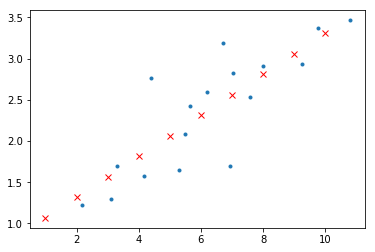

In [13]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = model.predict(x)
plt.plot(X, Y, '.') 
plt.plot(x, y, 'rx')
plt.show()

# what are a and b in y = ax + b?

In [14]:
weight = model.layers[0].get_weights()
print(weight)

[array([[0.24885026]], dtype=float32), array([0.8185434], dtype=float32)]
